### Откройте файл с данными и изучите общую информацию. 

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [12]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

### Общая информация о полученных данных

Посмотрим общую информацию

In [13]:
data.shape

(23699, 22)

Имеется 23699 строк в 22 колонках

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Необходимо изменить тип данных:
1. last_price - тип 'int'
2. first_day_exposition - тип 'datetime'
3. ceiling_height - тип 'int'
4. floors_total - тип 'int'
5. is_apartment - булево значение
6. balcony - тип 'int'
7. days_exposition - тип 'int'
8. cityCenters_nearest - изменить наименование столбца

Проверим отсутствующие значения

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В ряде столбцов имеются пропуски данных. Необходимо определить причину пропусков и заполнить пропущенные данные.

Получаем общую информацию о структуре датасета

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Построим общую гистограмму для всех числовых столбцов таблицы

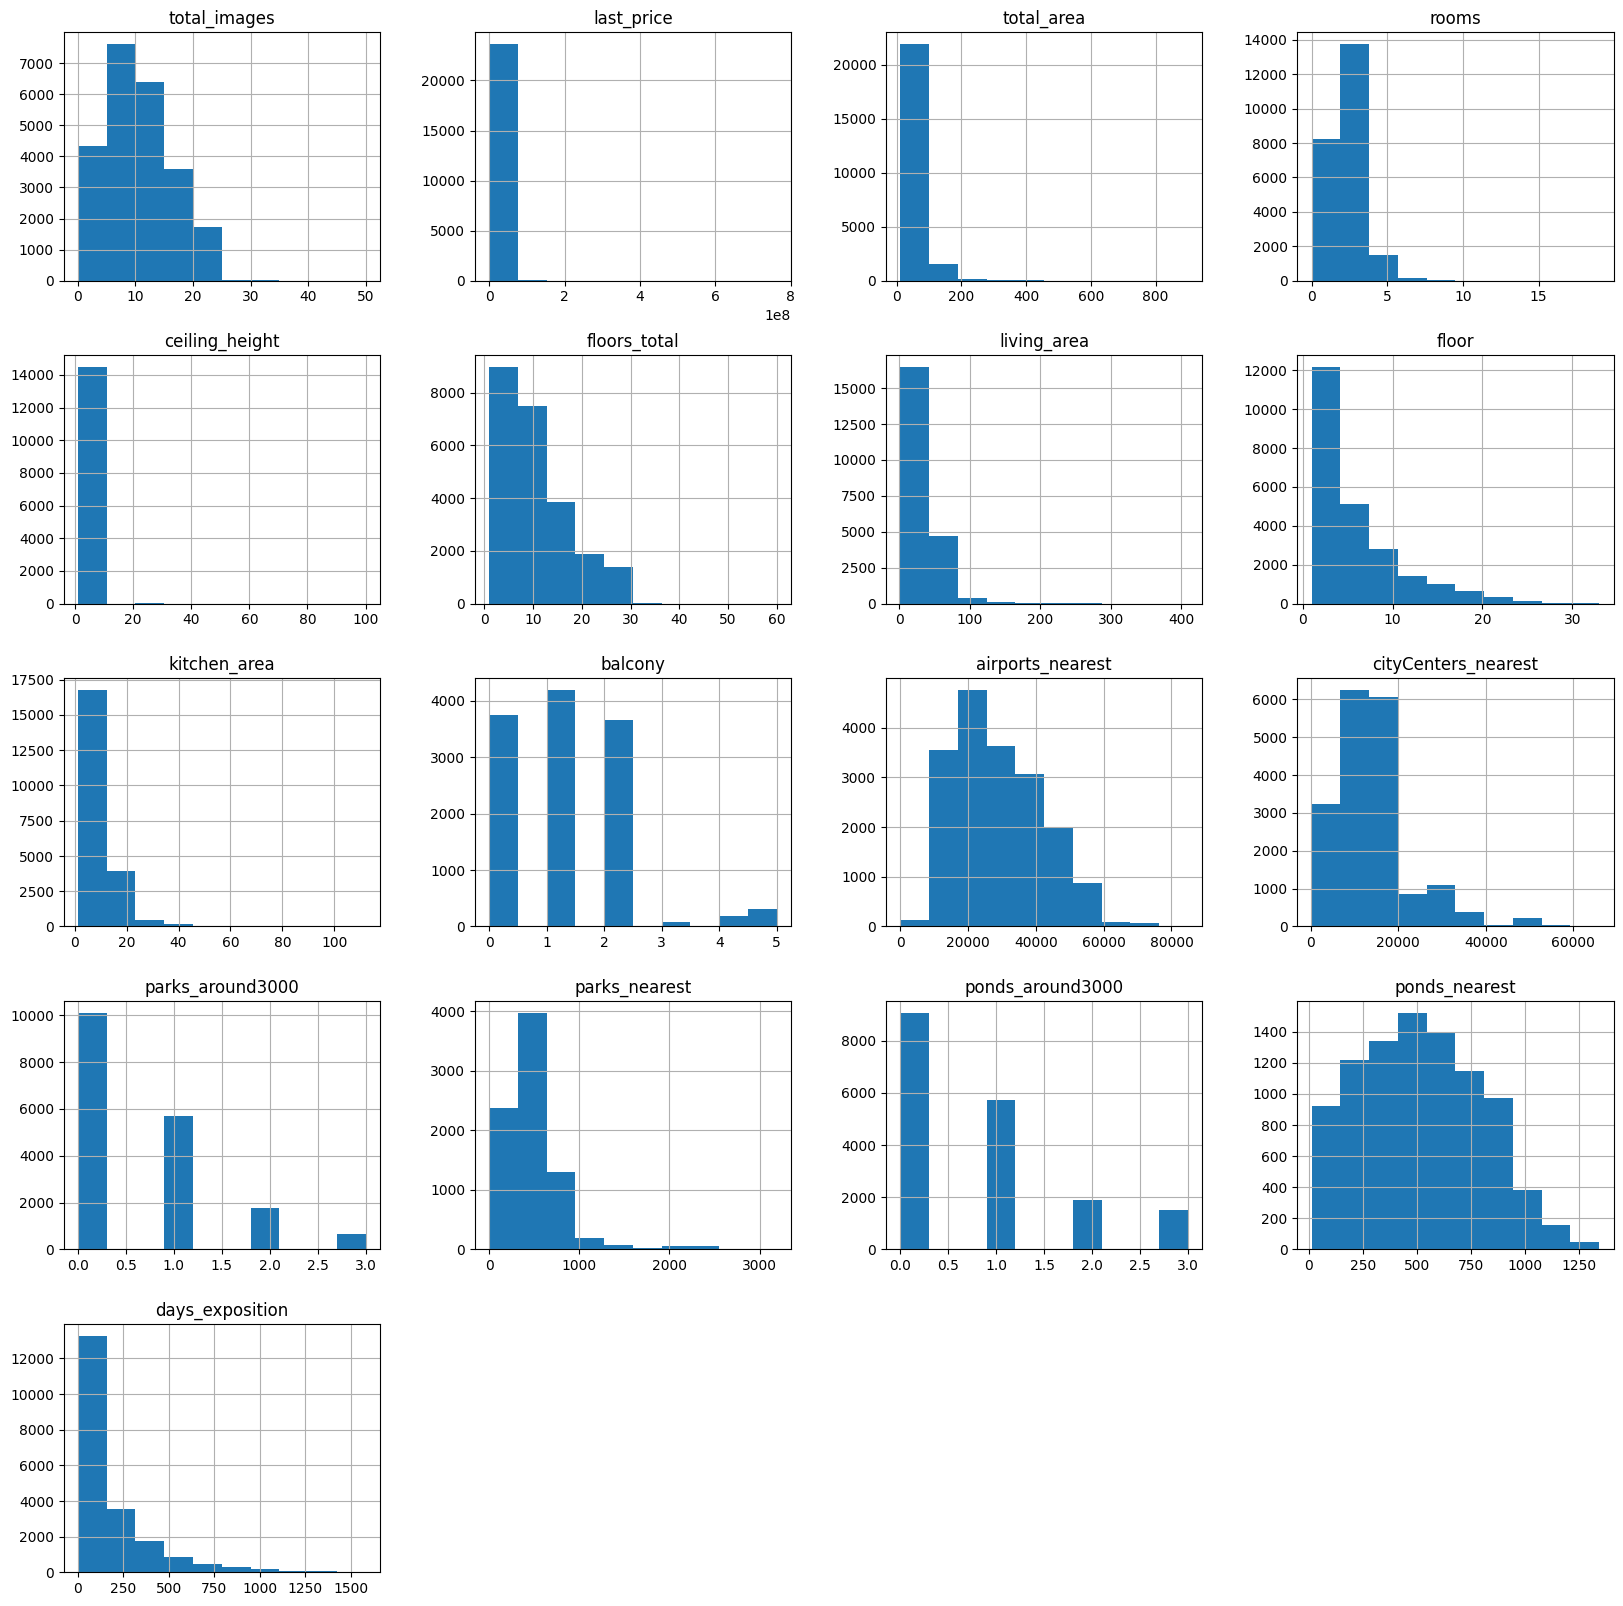

In [17]:
data.hist(figsize=(20, 20))
plt.show()

### Предобработка данных

Переименовываем столбцы.

In [18]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

Приводим дату публикации в формат даты без времени, т.к. время не указано

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])#, format='%Y-%m-%d')

Обрабатываем пропуски в столбце количества этажей. Пропущено 0.4% значений. Причина пропусков: Пользователи посчитали это значение несущественным. Этажность дома является существенным параметром квартиры, поэтому заменить средним или медианным значением будет неправильно. Кроме того, количество пропусков незначительно, поэтому удалям строки с пустыми значениями. 
Меняем тип данных на целочисленный.

In [20]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

Обрабатываем пропуски в жилой площади. Предполагаем, что жилая площадь в среднем кореллирует с общей площадью. Причиной пропуска может быть техническая ошибка

In [21]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

Обрабатываем пропуски в площади кухни. Предполагаем, что площадь кухни в среднем кореллирует с общей площадью. Причиной пропуска может быть техническая ошибка

In [22]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Обрабатываем пропуски в столбце апартаментов. Считаем, что пропуск в данном столбце обозначает, что квартира не является апартаментами.

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Обрабатываем пропуски в столбце балконов. Предполагаем, что отсутствие значений обозначает отсутствие балкона в квартире. Меняем значения на 0. Меняем тип данных на целочисленный.

In [24]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

Пропуски в столбце названия населенного пункта. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе.Вообще это один из самых главных признаков в датасете, заполнить его корректными значениями не представляется возможным.

In [25]:
data.dropna(subset=['locality_name'], inplace=True)

Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету

In [26]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Заменим пропуски в days_exposition и заменим тип данных.Предполагаем, что в случае отсутствия данных в датасете квартира не показывалась, поэтому меняем на 0

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0

In [29]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

Посмотрим на аномальные значения

In [30]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.592091,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,156.420115
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991026,6.594823,22.373512,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,213.517293


Обработаем аномальные значения в дальнейшем, после изучения данных подробнее.. 

Проверим явные дубликаты

In [31]:
data.duplicated().sum()

0

Явных дубликатов нет, смотрим неявные

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приводим все названия в нижний регистр

In [33]:
data['locality_name'] = data['locality_name'].str.lower()

Меняем ё на е

In [34]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#### Промежуточные выводы
В целом особых аномальных значений не выявлено. Площади квартир от 12 до 900 кв.м., при этом количество комнат от 0 (видимо, студия) до 19. Стоимость квартир также варьируется от 12 100 рублей до 763 млн. Несколько выбивается высота потолков.
Приводить названия типа "поселок городского типа рябово" к "поселок рябово" считаю нецелесообразным, т.к. нет уверенности в том, что это один и тот же поселок.

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип квадратного метра

In [35]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

Добавляем столбцы

In [36]:
#дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday
#месяца
data['month'] = data['first_day_exposition'].dt.month
#года
data['year'] = data['first_day_exposition'].dt.year

Добавляем столбец с типом этажа

In [37]:
data['floor_category_digit'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Добавляем столбец с расстоянием до до центра города в километрах

In [38]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] // 1000

### Проведите исследовательский анализ данных

#### Изучение параметров объектов, построение отдельных гистограмм для каждого из параметров.

##### Общая площадь

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

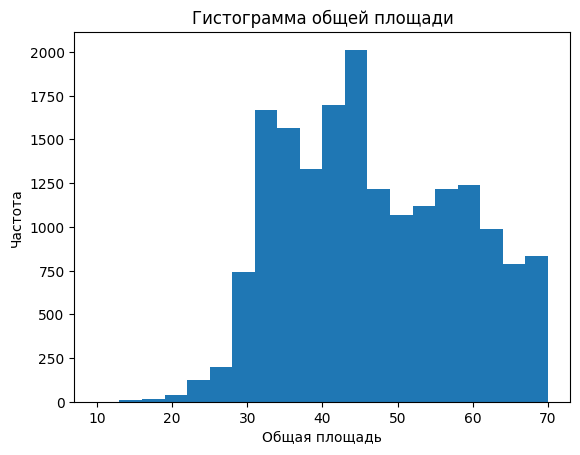

In [39]:
plt.hist(data['total_area'], bins=20, range=(10,70))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь')
_ = plt.ylabel('Частота')
data['total_area'].describe()

Большинство продающихся квартир площадью от 25 до 100 кв.м., особых аномалий не выявлено. Однако нужно иметь в виду, что в выборке есть как очень дешевые варианты, так и очень дорогие варианты.

##### Жилая площадь

count    23565.000000
mean        34.592091
std         22.373512
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

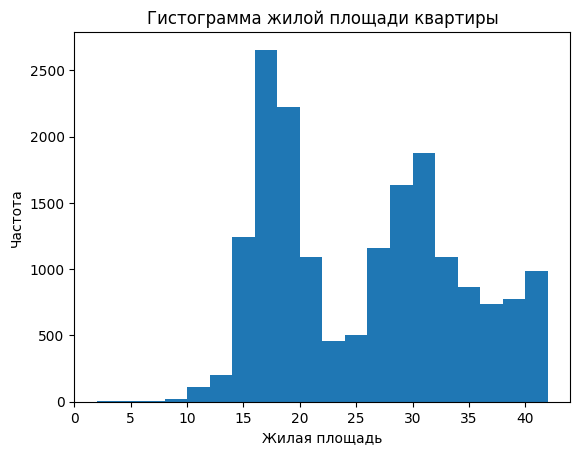

In [40]:
plt.hist(data['living_area'], bins=20, range=(2,42))
plt.title('Гистограмма жилой площади квартиры')
plt.xlabel('Жилая площадь')
_ = plt.ylabel('Частота')
data['living_area'].describe()

Самые распространённые варианты с жилой площадью от 10 до 50 метров. Площади меньше 10 метров и большее 80 метров встречаются в единичных случаях. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

In [41]:
# Отбросим значения с жилой площадью меньше 10кв.м.
# Отбросим квартиры с жилой площадью более 200 кв.м.
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

##### Площадь кухни

count    23491.000000
mean        10.427165
std          5.732458
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

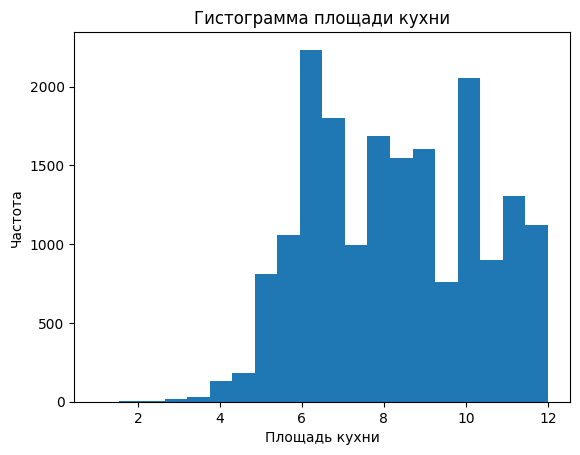

In [42]:
plt.hist(data['kitchen_area'], bins=20, range=(1,12))
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни')
_ = plt.ylabel('Частота')
data['kitchen_area'].describe()

Самые распространенные площади кухни - от 7 до 12 метров. 

In [43]:
# Удалим строки с площадью кухни меньше 2 кв.м. и больше 50 кв.м.
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

##### Цена объекта

count    2.344700e+04
mean     6.256488e+06
std      7.528749e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.730300e+06
max      3.300000e+08
Name: last_price, dtype: float64

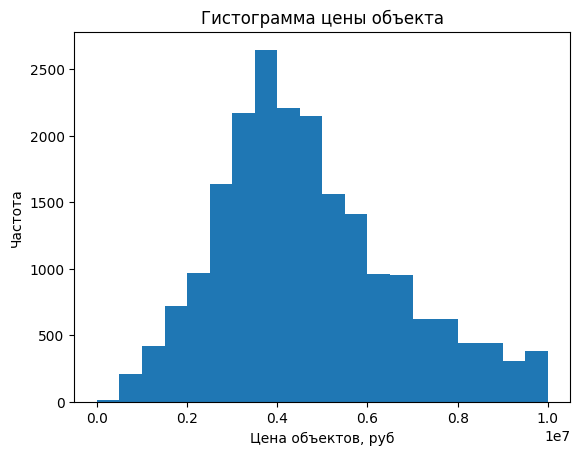

In [44]:
plt.hist(data['last_price'], bins=20, range=(0,10000000))
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена объектов, руб')
_ = plt.ylabel('Частота')
data['last_price'].describe()

Средняя стоимость квартиры составляет около 4,5 млн. рублей. Однако встречаются как очень дешевые варианты, так и очень дорогие - стоимостью более 500 млн.рублей.


Квартиры со слишком большой площадью более 500 кв.м. похожи на элитную недвижимость, их немного и лучше удалить.

In [45]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

##### Количество комнат

count    23447.000000
mean         2.060264
std          1.048916
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

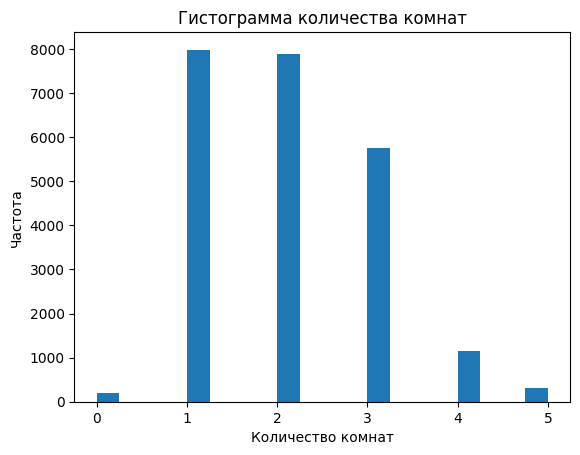

In [46]:
plt.hist(data['rooms'], bins=20, range=(0,5))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
_ = plt.ylabel('Частота')
data['rooms'].describe()

Основная масса квартир - одно- и двухкомнатные, квартиры с 0 комнат - это либо студии, либо апартаменты.

Проверим площади квартир с 0 комнат

In [47]:
data.query('rooms == 0 and is_apartment != True')['total_area'].describe()

count    191.000000
mean      27.604241
std        8.454094
min       15.500000
25%       24.150000
50%       26.100000
75%       28.350000
max       98.400000
Name: total_area, dtype: float64

In [48]:
data.query('rooms == 0 and is_apartment != True and total_area > 30')['total_area'].count()

31

Т.е. квартиры с количеством комнат 0 не являются апартаментами. Это либо студии, либо собственники не указали количество комнат. Квартир, котрые не являются студиями, всего 30, поэтому можем пренебречь данными. 

Удалим из выборки квартиры с количеством комнат более 7

In [49]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

##### Высота потолков

count    23425.000000
mean         2.722423
std          0.992730
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

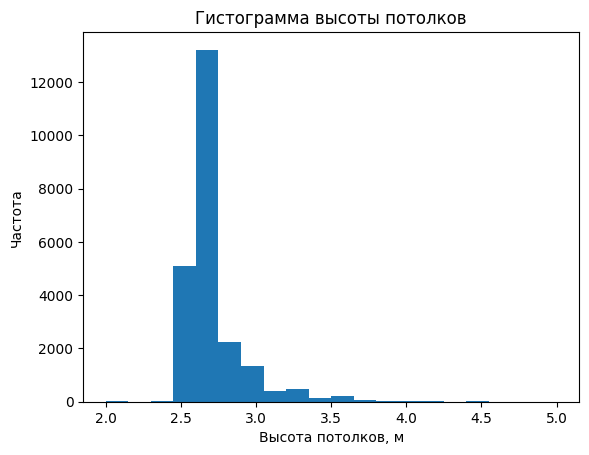

In [50]:
plt.hist(data['ceiling_height'], bins=20, range=(2,5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')
data['ceiling_height'].describe()

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 3.5 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра. Потолок в 100 метров - это очевидный выброс, связанный с ошибкой в данных. 


В соответствии со СНиП 31-01-2003 не допускаются квартиры с высотой потолков менее 2.5 м. Удаляем из выборки.
Удаляем квартиры с высотой потолков от 4 до 25 метров.
Для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6 метра.
Удаляем квартиры с высотой потолков от 36 метров.

In [51]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

##### Этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме.

count    23301.000000
mean         5.888073
std          4.879026
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

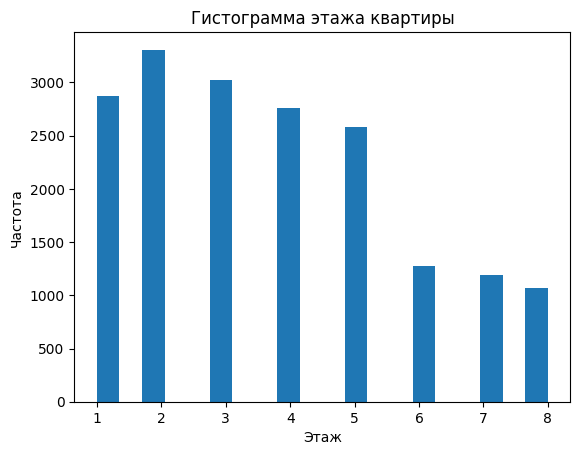

In [52]:
plt.hist(data['floor'], bins=20, range=(1,8))
plt.title('Гистограмма этажа квартиры')
plt.xlabel('Этаж')
_ = plt.ylabel('Частота')
data['floor'].describe()

count    3281.000000
mean        7.151478
std         4.838039
min         1.000000
25%         5.000000
50%         5.000000
75%         9.000000
max        27.000000
Name: floor, dtype: float64

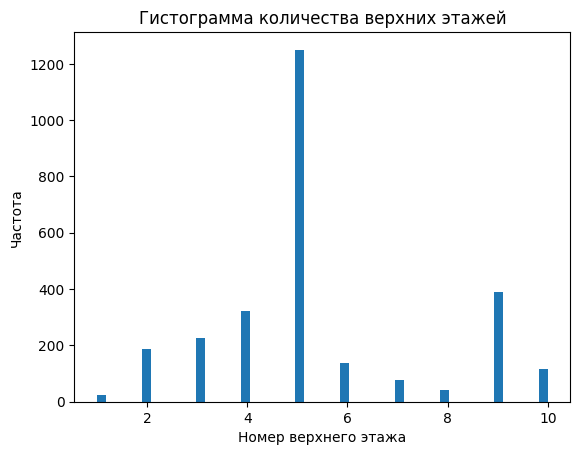

In [53]:
floor_filtred_last = data.query('floor_category == "последний"')['floor']  
plt.hist(floor_filtred_last, bins=50, range=(1,10))
plt.title('Гистограмма количества верхних этажей')
plt.xlabel('Номер верхнего этажа')
_ = plt.ylabel('Частота')
floor_filtred_last.describe()

Исходя из представленной выборки к продаже чаще всего предлагаются квартиры в пяти- и дявятиэтажных домах, т.е. жилой фонд еще советской постройки. Есть несколько одноэтажных домов.

##### Расстояние до центра города в метрах

count    17841.000000
mean     14252.400818
std       8606.958711
min        181.000000
25%       9365.000000
50%      13142.000000
75%      16300.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

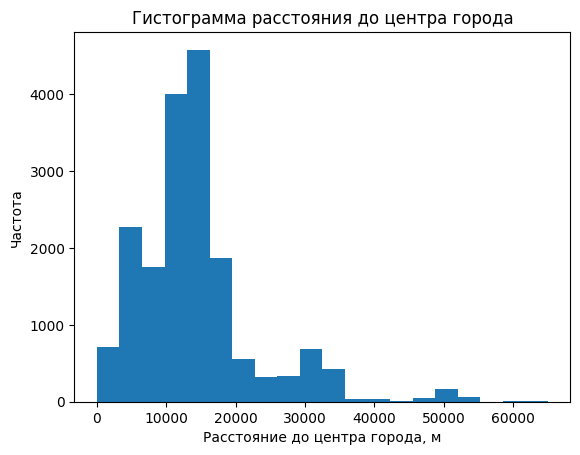

In [54]:
plt.hist(data['city_centers_nearest'], bins=20, range=(1,65000))
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
_ = plt.ylabel('Частота')
data['city_centers_nearest'].describe()

Основная часть квартир находится на расстоянии от 10000 м до 20000 метров, что прямо указывает на спальные районы города.

##### Расстояние до ближайшего аэропорта

count    17821.000000
mean     28820.514561
std      12667.098581
min          0.000000
25%      18522.000000
50%      26798.000000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64

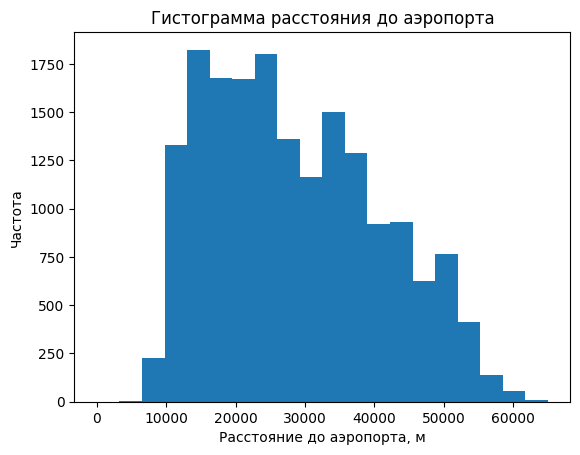

In [55]:
plt.hist(data['airports_nearest'], bins=20, range=(1,65000))
plt.title('Гистограмма расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта, м')
_ = plt.ylabel('Частота')
data['airports_nearest'].describe()

Распределение значений расстояний до аэропорта представляет что-то среднее между нормальным и распределением Пуассона 

##### Расстояние до ближайшего парка

count    7883.000000
mean      490.983636
std       342.036215
min         1.000000
25%       288.000000
50%       454.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

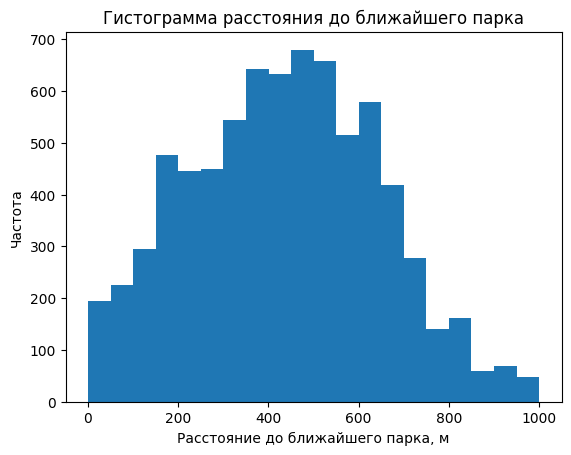

In [56]:
plt.hist(data['parks_nearest'], bins=20, range=(1,1000))
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
_ = plt.ylabel('Частота')
data['parks_nearest'].describe()

Судя по графику парки находятся в пешей доступности.

##### День и месяц публикации объявления

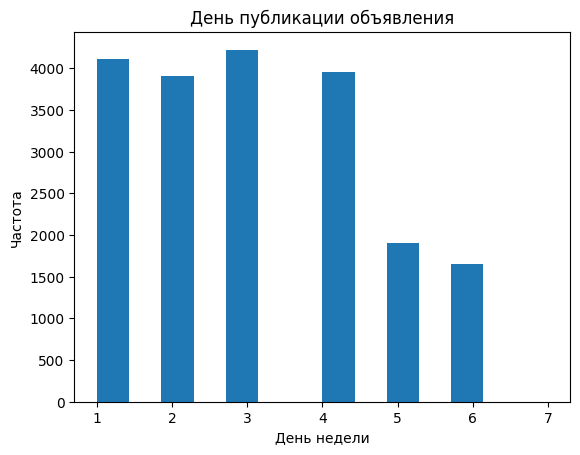

In [57]:
plt.hist(data['weekday'], bins=14, range=(1,7))
plt.title('День публикации объявления')
plt.xlabel('День недели')
_ = plt.ylabel('Частота')


Налицо тенденция публикации объявлений в рабочие дни. В воскресенье публикаций нет

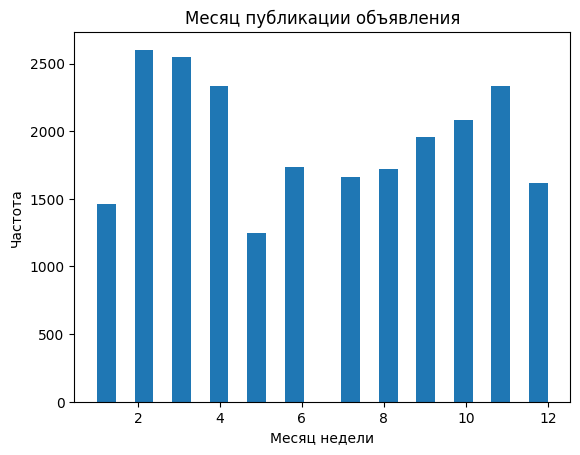

In [58]:
plt.hist(data['month'], bins=24, range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц недели')
_ = plt.ylabel('Частота')

В основном публикуются объявления зимой, кроме января. Январские праздники сильно влияют на экономику. Летом традиционно отпускной сезон.

#### Изучаем, как быстро продавались квартиры

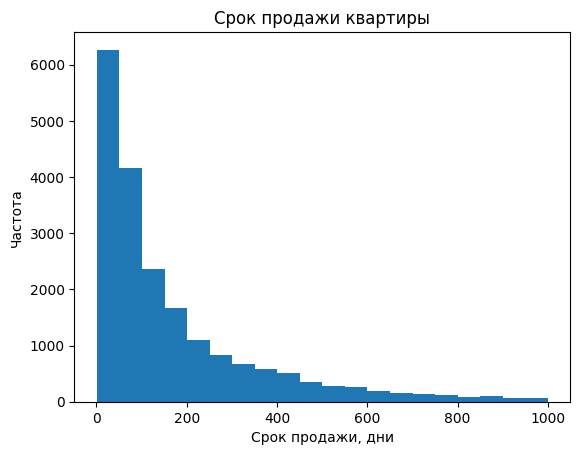

In [59]:
plt.hist(data['days_exposition'], bins=20, range=(1,1000))
plt.title('Срок продажи квартиры')
plt.xlabel('Срок продажи, дни')
_ = plt.ylabel('Частота')

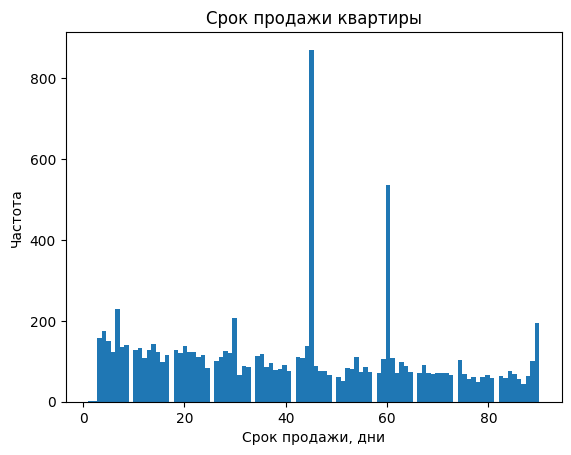

In [60]:
plt.hist(data['days_exposition'], bins=100, range=(1,90))
plt.title('Срок продажи квартиры')
plt.xlabel('Срок продажи, дни')
_ = plt.ylabel('Частота')

In [61]:
print('Среднее количество дней продажи', data['days_exposition'].mean())
print('Медиана по дням продажи', data['days_exposition'].median())

Среднее количество дней продажи 155.98326252092184
Медиана по дням продажи 73.0


In [62]:
data['days_exposition'].describe()

count    23301.000000
mean       155.983263
std        212.974198
min          0.000000
25%         22.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

Основная масса квартир была продана в срок до 100 дней. На графиках мы видим резкие выбросы на 45, 69 и 90 днях публикации. Видимо, это связано со сроками оплаченных договоров на платное размещение и не может четко отражать тенденцию по продаже квартиры именно в этот срок.
Срок продажи квартиры от 5 до 10 рабочих дней - это быстро, более полугода - долго. Продажа квартиры более года - необычайно долго.
Среднее количество дней продажи отличается от медианного значения более чем в 2 раза. Это связано с необычайно долгой продажей нестандартной/элитной недвижимости.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучаем зависимость цена от этих факторов

##### Общая площадь

In [63]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_digit']

for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 67.33%
Корреляция между last_price и living_area составляет: 59.85%
Корреляция между last_price и kitchen_area составляет: 51.35%
Корреляция между last_price и rooms составляет: 39.46%
Корреляция между last_price и floor_category_digit составляет: 4.84%


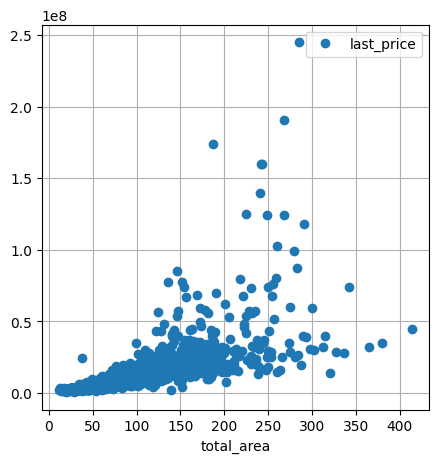

In [64]:
# Зависимость цены от общей площади
data.pivot_table(index='total_area', values='last_price')\
    .plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Зависимость цены от площади прослеживается четко. Коэффициент корелляции составляет 65.36%. Однако видно, что приувеличении площади увеличивается разброс цен. Это, в принципе, объяснимо, т.к. при увеличении площади квартиры увеливается как разброс платежеспособности участников сделки, так и степень подготовки квартиры к продаже - ремонт, оборудование и т.д.

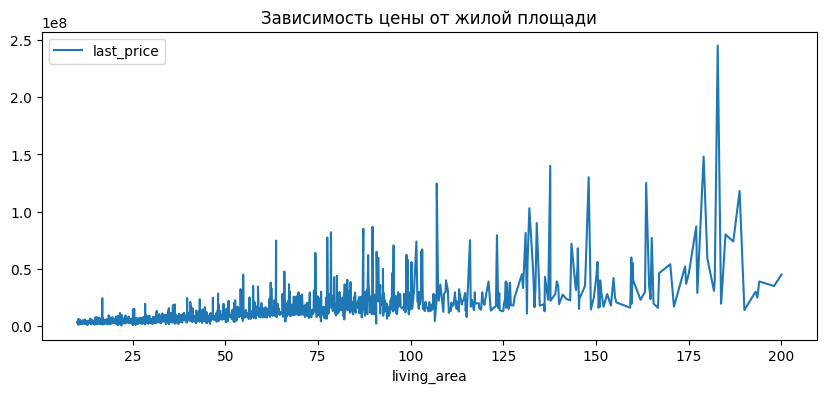

In [65]:
# Зависимость цены от жилой площади

data.pivot_table(index='living_area', values='last_price')\
.plot(style='-',title='Зависимость цены от жилой площади', figsize=(10,4))
plt.show()

Расчет корреляции показывает незначительную зависимость цены от жилой площади. На графике видна более четкая зависимость для площади от 10 до 70 кв.м. Остальные значения площади более подвержены разбросу по цене

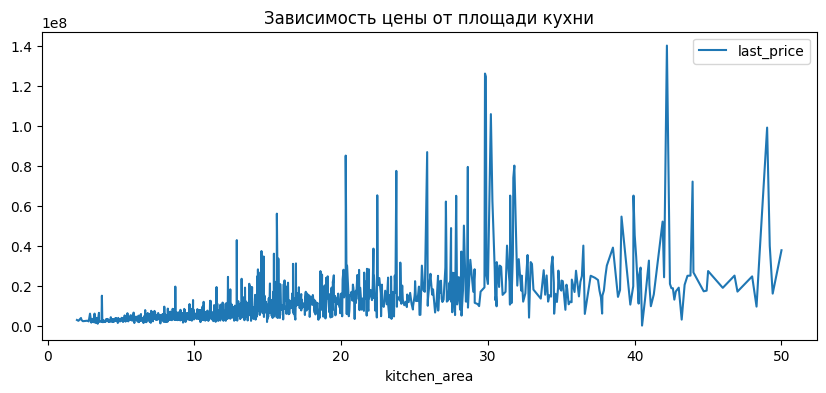

In [66]:
# Зависимость цены от площади кухни

data.pivot_table(index='kitchen_area', values='last_price')\
.plot(style='-',title='Зависимость цены от площади кухни', figsize=(10,4))
plt.show()

График и расчёт корреляции показывают слабую зависимость цены от площади кухни

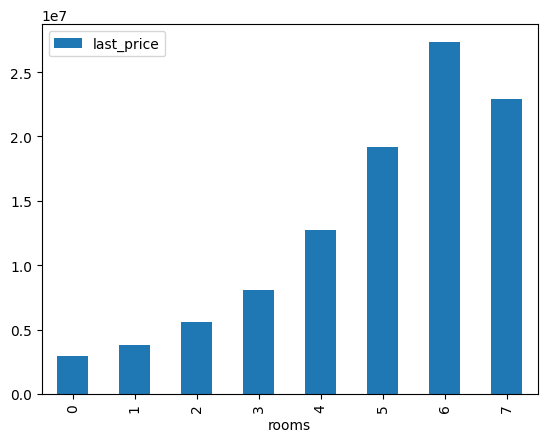

In [67]:
# Зависимость цены от количества комнат

data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')
plt.show()

Расчёт коэффициента коррекляции Пирсона показывает небольшую зависимость цены от количества комнат. График это подтверждает. В принципе логично, т.к. увеличение количества комнат очевидно влечет увеличение общей площади квартиры.

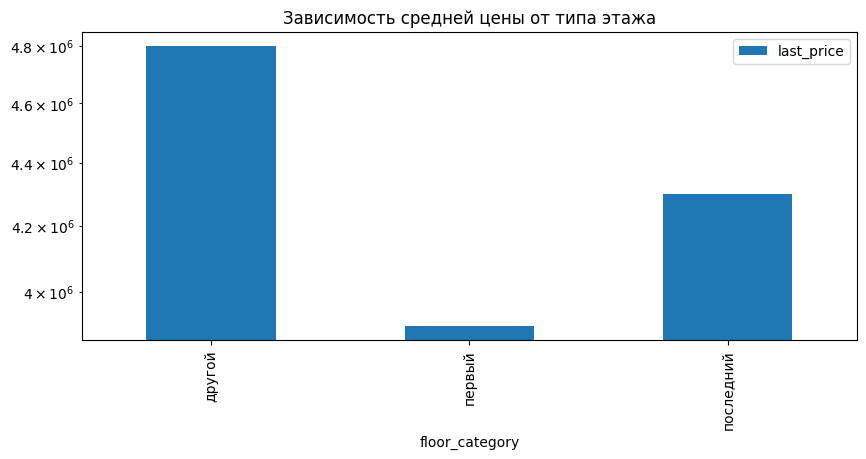

In [68]:
data.pivot_table(index='floor_category', values='last_price', aggfunc=('median'))\
.plot(style='-',title='Зависимость средней цены от типа этажа', figsize=(10,4), kind='bar', logy=True)
plt.show()

Графики показывают низкую стоимость квартир первого этажа и сниженную по сравнению с другими стоимость последних этажей зданий

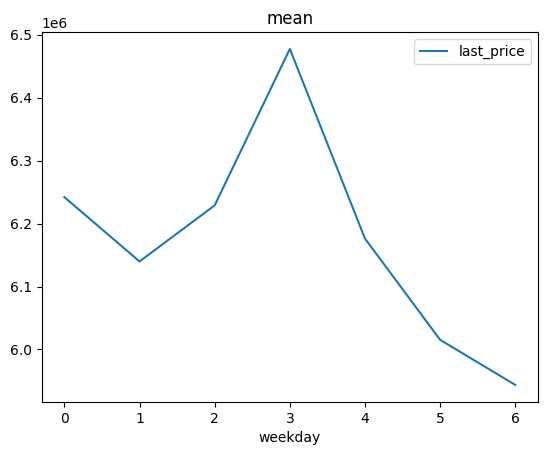

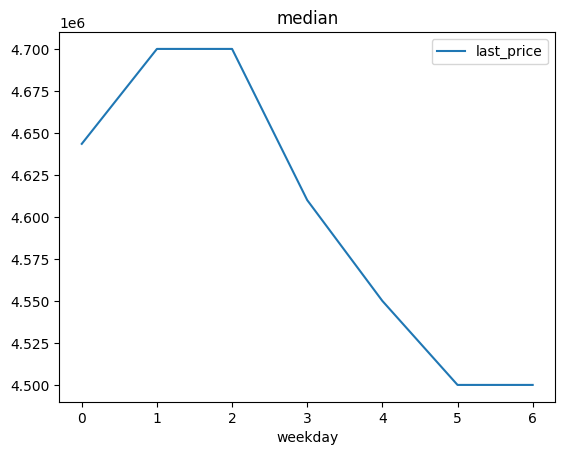

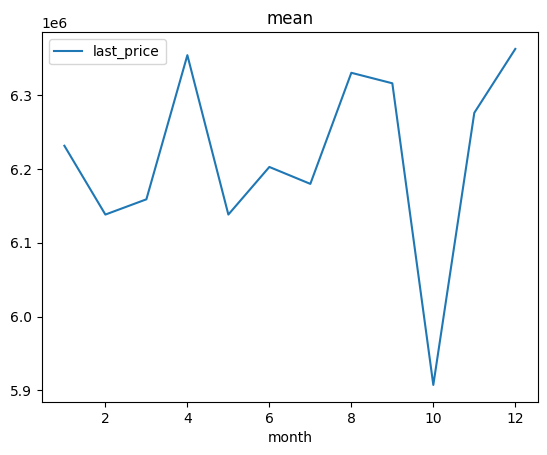

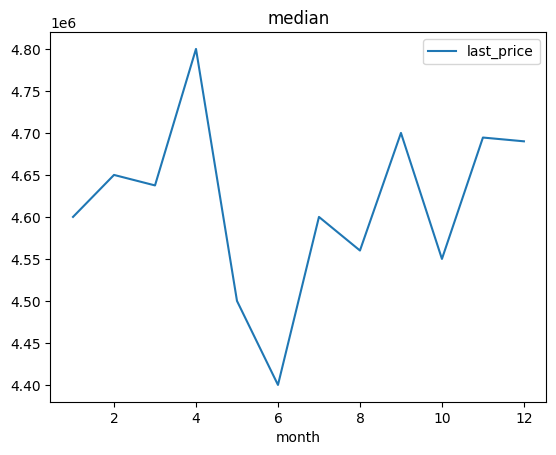

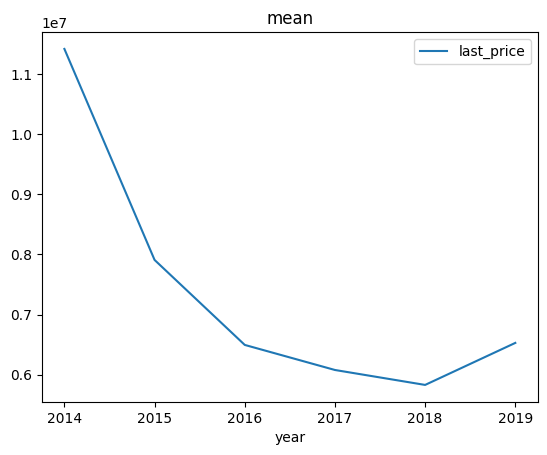

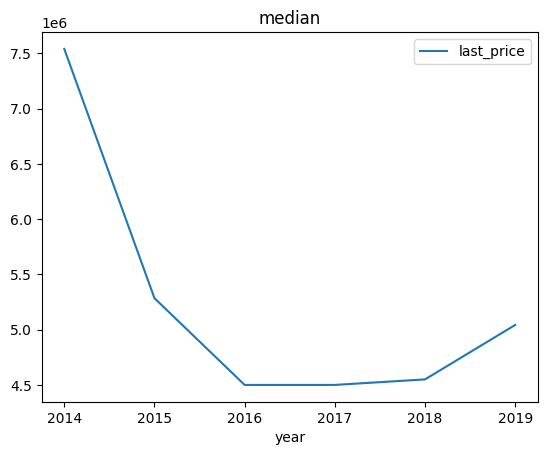

In [69]:
data.pivot_table(index='weekday',values='last_price', aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Графики показывают полную независимость цены от дня и месяца размещения объявления. Однако прослеживается спад  цены с 2014 года по 2018 год. Видимо, общий экономический кризис повлиял на спрос и цену предложения. Начиная с 2018 года цена начинает восстанавливаться.

#### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [70]:
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
санкт-петербург,15443,7.586591e+06,5500000.0
пушкин,361,6.298987e+06,5150000.0
поселок парголово,326,4.492946e+06,4115000.0
деревня кудрово,299,4.234158e+06,3790000.0
поселок шушары,438,4.109603e+06,3950000.0
колпино,336,3.868569e+06,3600000.0
всеволожск,396,3.794568e+06,3465000.0
поселок мурино,551,3.657102e+06,3400000.0


Наибольшая стоимость одного квадратного метра жилья в г.Санкт-Петербург, наименьшая в Выборге.

#### Изучаем зависимость стоимости квартиры от расстояния до центра Санкт-Петербурга

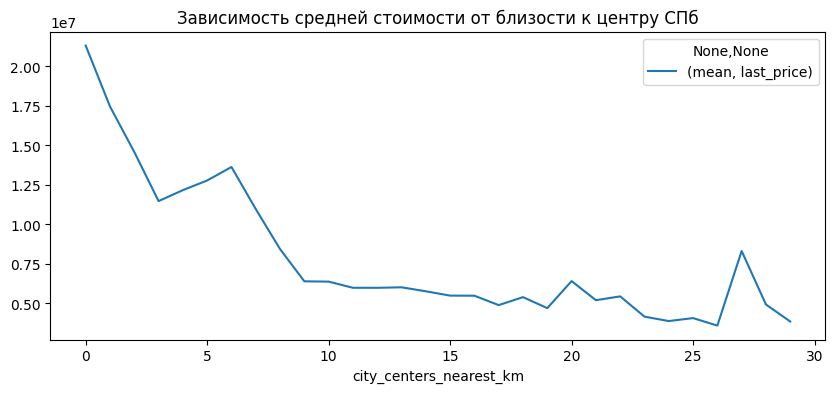

In [71]:
data[data['locality_name']=='санкт-петербург']\
.pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc=['mean'])\
.plot(style='-',title='Зависимость средней стоимости от близости к центру СПб', figsize=(10,4))
plt.show()

На графике видимо очевидное снижение цены по мере удаления от центра города. Самые дорогие квартиры в радиусе 2 км от центра.
Пики на 20 и 27 км объяснить неместному сложно, возмлжно, это элитные ЖК или поселки.

### Общий вывод

В проекте исследованы данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Определены ключевые параметры, влияющие на стоимость квартир:
- Основная зависимость - от близости к центру Санкт-Петербурга;
- Четко прослеживающаяся зависисмость цены от площади.
Остальные параметры влияют на цену квартир слабо.
Срок продажи квартиры от 5 до 10 рабочих дней - это быстро, более полугода - долго. Основная масса квартир продана достаточно быстро. 
В рамках проведенного исследования найдены определенные особенности и зависимости, существующие на рынке недвижимости региона.